In [56]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("/content/APEXFOOT.csv",parse_dates=['DATE'])
df.head()

#       DATE TRADING CODE   LTP*  ...    YCP  TRADE  VALUE (mn)  VOLUME
0  439 2018-05-08     APEXFOOT  331.7  ...  341.2    143       5.122  15,334
1  438 2018-06-08     APEXFOOT  331.2  ...  332.7     94       3.217   9,626
2  437 2018-07-08     APEXFOOT  327.1  ...  331.8    123       3.645  11,049
3  436 2018-08-08     APEXFOOT  325.1  ...  327.7    118       6.380  19,344
4  435 2018-09-08     APEXFOOT  322.0  ...  328.4    165       7.030  21,712

[5 rows x 12 columns]

In [58]:
from google.colab import drive

In [59]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
!ls "/content/drive/My Drive"

 Aggression_detection
 annotation
 Annotation-data
 assignment
 assignment1.zip
 assignment.ipynb
 assignment_ML
 assignment_shapna.zip
'BANGLA OCR'
 Classroom
 CNN
'Colab Notebooks'
 conference-template-a4.docx
 consent_form_1721568042.docx
'consent form.docx'
'Cooking vlog-shapna '
 deeplearning
'DevOps Engineer.jpg'
 Diabetes_prediction
'dogs-vs-cats '
'ECO Lecture -3.gdoc'
'emu8086.zip (Unzipped Files)'
 finalExam_cse445.docx
 FinalExam_mst.shapna-akter_1721568042.docx
 finalNepal.xls
 finalreport.rtf
 full_traindata.zip
 FUwangfood.ipynb
'Getting started.pdf'
'housing price prediction'
 housingPrice_testDataHandle.ipynb
 implementation_LSTM
 LAB2_1721568042.zip
 LAB4_1721568042.zip
 labeledTrainData.tsv
 mask
'mid -missing part.pdf'
 midterm_1721568042.docx
 midterm_ML
 ML_midterm_1721568042.docx
 ModelFile.zip
'mst shapna akter_1721568042.docx'
 mst_shapna_akter_1721568042.docx
 mst.shapna-akter_1721568042.docx
'mst shapna akter-1721568042-sec09.pdf'
 mst.shapna-akter_1721568042.

In [61]:
# Sort DataFrame by date
df = df.sort_values('DATE')

# Double check the result
df.head()

#       DATE TRADING CODE   LTP*  ...    YCP  TRADE  VALUE (mn)  VOLUME
36  403 2018-01-10     APEXFOOT  296.5  ...  298.9    139       2.509   8,392
59  380 2018-01-11     APEXFOOT  269.9  ...  270.7     72       1.005   3,724
37  402 2018-02-10     APEXFOOT  294.4  ...  297.9    237       5.574  18,816
79  360 2018-02-12     APEXFOOT  273.0  ...  273.9    107       2.479   9,064
16  423 2018-03-09     APEXFOOT  319.7  ...  309.5    224       8.640  26,931

[5 rows x 12 columns]

In [62]:
df = df.set_index('DATE')
df.head(3)

# TRADING CODE   LTP*   HIGH  ...    YCP  TRADE  VALUE (mn)  VOLUME
DATE                                        ...                                  
2018-01-10  403     APEXFOOT  296.5  300.1  ...  298.9    139       2.509   8,392
2018-01-11  380     APEXFOOT  269.9  273.0  ...  270.7     72       1.005   3,724
2018-02-10  402     APEXFOOT  294.4  297.9  ...  297.9    237       5.574  18,816

[3 rows x 11 columns]

In [63]:
df['daily_ret'] = df['CLOSEP*'].pct_change()
df['daily_ret'] = df['daily_ret'].fillna(0.0)

In [64]:
df['volatility']= df['daily_ret'].rolling(window=21).std()
df['volatility'] = df['volatility'].fillna(0.0)

In [65]:
df['volatility'] = df['volatility']*100

In [66]:
import matplotlib.pyplot as plt 

In [67]:
df=df.reset_index()['volatility']

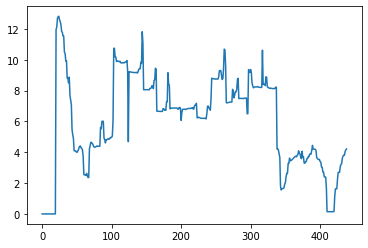

In [68]:
plt.plot(df)

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [70]:
##splitting dataset into train and test split where train=70 percent and test=30 percent
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]




In [71]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [],[]
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [72]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [73]:
ytest.shape


(31,)

In [74]:

print(X_test.shape)

(31, 100)


In [75]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [76]:
X_test.shape

(31, 100, 1)

In [ ]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [77]:
filepath1 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsApexfoot/model1.h5"
filepath2 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsApexfoot/model2.h5"
filepath3 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsApexfoot/model3.h5"

In [78]:

#1D cnn model
# define model
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100,1)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(50, activation='relu'))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')
model1.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)


Epoch 1/100
7/7 [==============================] - 1s 39ms/step - loss: 0.1980 - val_loss: 0.0254
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0450 - val_loss: 0.0717
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0263 - val_loss: 0.0411
Epoch 4/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0199 - val_loss: 0.0557
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0140 - val_loss: 0.0455
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0128 - val_loss: 0.0536
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0103 - val_loss: 0.0570
Epoch 8/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0080 - val_loss: 0.0576
Epoch 9/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0066 - val_loss: 0.0701
Epoch 10/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0066 - val_loss: 0.0796
Epoch 11/100
7/7 [=

In [79]:
model1.save(filepath1)

In [80]:
#LSTM  model
model2=Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 7s 409ms/step - loss: 0.3187 - val_loss: 0.0730
Epoch 2/100
7/7 [==============================] - 1s 153ms/step - loss: 0.0427 - val_loss: 0.0308
Epoch 3/100
7/7 [==============================] - 1s 160ms/step - loss: 0.0260 - val_loss: 0.0363
Epoch 4/100
7/7 [==============================] - 1s 147ms/step - loss: 0.0128 - val_loss: 0.0672
Epoch 5/100
7/7 [==============================] - 1s 149ms/step - loss: 0.0140 - val_loss: 0.0461
Epoch 6/100
7/7 [==============================] - 1s 153ms/step - loss: 0.0111 - val_loss: 0.0489
Epoch 7/100
7/7 [==============================] - 1s 146ms/step - loss: 0.0106 - val_loss: 0.0592
Epoch 8/100
7/7 [==============================] - 1s 148ms/step - loss: 0.0099 - val_loss: 0.0509
Epoch 9/100
7/7 [==============================] - 1s 149ms/step - loss: 0.0104 - val_loss: 0.0534
Epoch 10/100
7/7 [==============================] - 1s 147ms/step - loss: 0.0102 - val_loss: 0.0545
Epoch 11/

In [81]:
model2.save(filepath2)

In [82]:
#BILSTM model
model3=Sequential()
model3.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(100,1))))
model3.add(Bidirectional(LSTM(50,return_sequences=True)))
model3.add(Bidirectional(LSTM(50)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 14s 605ms/step - loss: 0.2095 - val_loss: 0.1761
Epoch 2/100
7/7 [==============================] - 2s 252ms/step - loss: 0.0296 - val_loss: 0.0617
Epoch 3/100
7/7 [==============================] - 2s 254ms/step - loss: 0.0252 - val_loss: 0.1328
Epoch 4/100
7/7 [==============================] - 2s 252ms/step - loss: 0.0176 - val_loss: 0.0844
Epoch 5/100
7/7 [==============================] - 2s 248ms/step - loss: 0.0154 - val_loss: 0.0796
Epoch 6/100
7/7 [==============================] - 2s 253ms/step - loss: 0.0119 - val_loss: 0.0796
Epoch 7/100
7/7 [==============================] - 2s 255ms/step - loss: 0.0083 - val_loss: 0.0629
Epoch 8/100
7/7 [==============================] - 2s 250ms/step - loss: 0.0086 - val_loss: 0.0615
Epoch 9/100
7/7 [==============================] - 2s 251ms/step - loss: 0.0083 - val_loss: 0.0476
Epoch 10/100
7/7 [==============================] - 2s 249ms/step - loss: 0.0078 - val_loss: 0.0405
Epoch 11

In [108]:
model3.save(filepath3)

In [27]:
from keras.models import load_model

In [28]:
# create list of loaded models use  load_model() 
all_models = list()
for i in range(3):
  filename = '/content/drive/MyDrive/StockPriceEnsembleDL/modelsApexfoot/model1/model'+str(i+1)+'.h5'
  model = load_model(filename)
  all_models.append(model)

In [29]:
print(len(all_models))

3


In [30]:
# perform test prediction with per models 
#model1
f1 = '/content/drive/MyDrive/StockPriceEnsembleDL/modelsApexfoot/model1.h5'
model = load_model(f1)


In [83]:

test_preds = model.predict(X_test)
print(test_preds.shape)
print(type(test_preds))

(31, 1)
<class 'numpy.ndarray'>


In [84]:
test_preds = np.reshape(test_preds,(1, test_preds.size))
test_predict=scaler.inverse_transform(test_preds)
X = np.reshape(ytest,(1, ytest.size))
Y_test =scaler.inverse_transform(X)

In [85]:
#Y_test = Y_test.transpose()
RMSE = math.sqrt(mean_squared_error(Y_test,test_preds))
RMSE

2.073715602151595

In [86]:

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test,z)
print('MAE: %f' % mae)


MAE: 1.698958


In [87]:

# stacked generalization with linear meta model on blobs dataset
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from keras.models import load_model
from keras.utils import to_categorical
from numpy import dstack

In [88]:
def DataPrep(datax):
  test_preds = np.reshape(datax,(1, datax.size))
  test_predict=scaler.inverse_transform(test_preds)
  return datax



In [89]:
def stacked_dataset(allModels, inputX):
	stackX = None
	for model in allModels:
		# make prediction
		yhat = model.predict(inputX, verbose=0)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat
		else:
			stackX = dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	
	return stackX

In [90]:
# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit standalone model
	model = LinearRegression()
	model.fit(stackedX, inputy)
	return model

In [91]:
#make prediction with stacked model

def stacked_prediction(members, model, inputX):
  #inputX = DataPrep(inputX)
	stackedX = stacked_dataset(members,inputX)
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat

In [92]:
#started from here
for i in range(len(all_models)):
	model = all_models[i]
	for layer in model.layers:
		# make not trainable
		layer.trainable = False
		# rename to avoid 'unique layer name' issue
		layer._name = 'ensemble_' + str(i+1) + '_' + layer.name

In [93]:

# define stacked model from multiple member input models
def define_stacked_model(members):
	# update all layers in all models to not be trainable
	for i in range(len(members)):
		model = members[i]
		for layer in model.layers:
			# make not trainable
			layer.trainable = False
			# rename to avoid 'unique layer name' issue
			layer._name = 'ensemble_' + str(i+1) + '_' + layer.name
	# define multi-headed input
	ensemble_visible = [model.input for model in members]
	# concatenate merge output from each model
	ensemble_outputs = [model.output for model in members]
	merge = concatenate(ensemble_outputs)
	hidden = Dense(10, activation='relu')(merge)
	output = Dense(3)(hidden)
	model = Model(inputs=ensemble_visible, outputs=output)
	model = Model(inputs=ensemble_visible, outputs=output)
	# plot graph of ensemble
	plot_model(model, show_shapes=True, to_file='model_graph.png')
	# compile
	# compile
	model.compile(optimizer='adam', loss='mse')
	return model

In [94]:

def fit_stacked_model(model, inputX, inputy):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# encode output data
	#inputy_enc = to_categorical(inputy)
	# fit model
	model.fit(X, inputy, epochs=300, verbose=0)

In [95]:
stacked_model = define_stacked_model(all_models)

In [96]:
#fit stacked model on test dataset
fit_stacked_model(stacked_model, X_test,ytest)

In [97]:

def predict_stacked_model(model, inputX):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# make prediction
	return model.predict(X)

In [98]:

# make predictions and evaluate
yhat = predict_stacked_model(stacked_model, X_test)
yhat = DataPrep(yhat)
yhat
#Y_test = DataPrep(Y_test)
#RMSE = math.sqrt(mean_squared_error(Y_test,yhat))
#RMSE
#print('Stacked Test Accuracy: %.3f' % RMSE)

array([[0.19292039, 0.2220401 , 0.11636168],
       [0.18663874, 0.21578747, 0.11769387],
       [0.18068837, 0.20986462, 0.11895581],
       [0.17281266, 0.2020253 , 0.12062607],
       [0.14969137, 0.1790109 , 0.12552956],
       [0.13210475, 0.16150558, 0.12925927],
       [0.11178747, 0.13862488, 0.13336599],
       [0.1027534 , 0.13228987, 0.13548404],
       [0.0959045 , 0.10878465, 0.13566716],
       [0.09240738, 0.09468988, 0.13560149],
       [0.09724533, 0.08024549, 0.13311046],
       [0.08373712, 0.08770402, 0.13756533],
       [0.08459398, 0.08415005, 0.1370484 ],
       [0.09354772, 0.08138668, 0.1342614 ],
       [0.10756248, 0.07706133, 0.12989908],
       [0.10179006, 0.07884286, 0.13169584],
       [0.11195913, 0.0757044 , 0.12853055],
       [0.11191696, 0.08673364, 0.12938163],
       [0.12113794, 0.09447239, 0.12731656],
       [0.1288963 , 0.11612732, 0.12673096],
       [0.1420424 , 0.13020353, 0.12401834],
       [0.15286277, 0.14552896, 0.12207007],
       [0.

In [99]:
  yhat=scaler.inverse_transform(yhat)

In [100]:
x, y, z = yhat.T

In [101]:
avg = (x+y+z)/3

In [48]:
avg.shape

(31,)

In [102]:
avg = np.reshape(avg,(1, avg.size))
x = np.reshape(x,(1, x.size))
y = np.reshape(y,(1, y.size))
z = np.reshape(z,(1, z.size))

In [50]:
avg

array([[0.19085275, 0.18574578, 0.18183641, 0.17267764, 0.14928666,
        0.1297108 , 0.11279371, 0.10119142, 0.0905562 , 0.08328625,
        0.07742331, 0.07510612, 0.07307819, 0.07115752, 0.06970555,
        0.07941851, 0.09209964, 0.10538844, 0.11636955, 0.1325802 ,
        0.15006001, 0.16516598, 0.1767361 , 0.18997908, 0.20185506,
        0.21235855, 0.2237251 , 0.23378348, 0.24202037, 0.24758458,
        0.25515893]], dtype=float32)

In [51]:
Y_test

array([[2.39999932, 2.39133286, 1.70376606, 0.14387177, 0.14387177,
        0.14387177, 0.14387177, 0.14387177, 0.14387177, 0.14387177,
        0.14387177, 0.14387177, 0.14387177, 0.15983648, 1.11889194,
        1.62668515, 1.62668515, 1.62509398, 2.25079261, 2.69872078,
        2.70246724, 2.70246724, 3.07388197, 3.20771914, 3.26346145,
        3.62172975, 3.76110493, 3.81095094, 3.81163522, 4.0595256 ,
        4.15521911]])

In [103]:
RMSE = math.sqrt(mean_squared_error(Y_test,avg))
RMSE

1.2177698995482065

In [104]:
RMSE = math.sqrt(mean_squared_error(Y_test,x))
RMSE

1.0634603773932911

In [105]:
RMSE = math.sqrt(mean_squared_error(Y_test,y))
RMSE

1.1507252572296225

In [106]:
RMSE = math.sqrt(mean_squared_error(Y_test,z))
RMSE

1.56781320218734

In [107]:

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test,x)
print('MAE: %f' % mae)


MAE: 0.950459
